In [3]:
## Netflix Content Exploration Analysis

In [4]:
#This project aims to explore how content has transformed on the Netflix platform. As a movie lover, this is an exciting project for me.Let's explore!

In [7]:
##Objective:##
#To understand how Netflix's content strategy has evolved over time using Python and data visualisation.

In [9]:
##Tools Used
"""
pandas
matplotlib and seaborn

"""

'\npandas\nmatplotlib and seaborn\n\n'

In [11]:
#Analysis
#Importing the dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cinema_palette = ['#E50914', '#F5C518', '#1C1C1C', '#FFFFFF']  # Netflix red, IMDb yellow, dark, white

sns.set_theme(
    style='whitegrid',       
    palette=cinema_palette    
)

#plt.style.use('dark_background')


In [4]:
df = pd.read_csv('/Users/reliancehealth/Downloads/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#Data Cleaning
#Check the number of empty fields
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
#Replace empty fields with a value 
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

In [9]:
# To clean the Title column
df['title'] = df['title'].str.strip()     # remove leading/trailing spaces
df['title'] = df['title'].str.title()     # convert to Title Case


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:
##Key Insights and Visuals


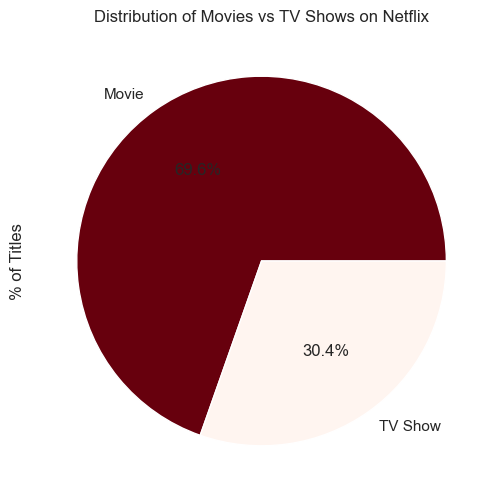

In [49]:
#Movies vs TV Shows Count

type_count=df['type'].value_counts()

type_count.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colormap='Reds_r')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.ylabel('% of Titles')
plt.show()

In [76]:
 ##Insight:##  
#Movies make up about 70% of Netflix’s catalog,while TV shows account for about 30%.


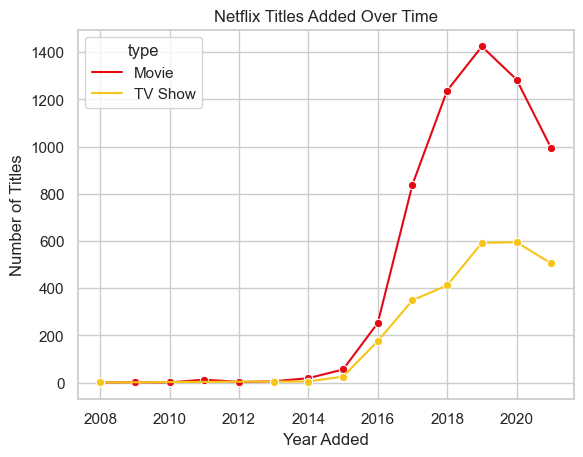

In [32]:
#Titles Added Over Time

df['year_added'] = df['date_added'].dt.year

titles_per_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

sns.lineplot(data=titles_per_year, x='year_added', y='count', hue='type', marker='o')
plt.title('Netflix Titles Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

In [1]:
##Insight##
#TV shows have been increasing steadily since 2016 while Movies have been increasing significantly since that same year.

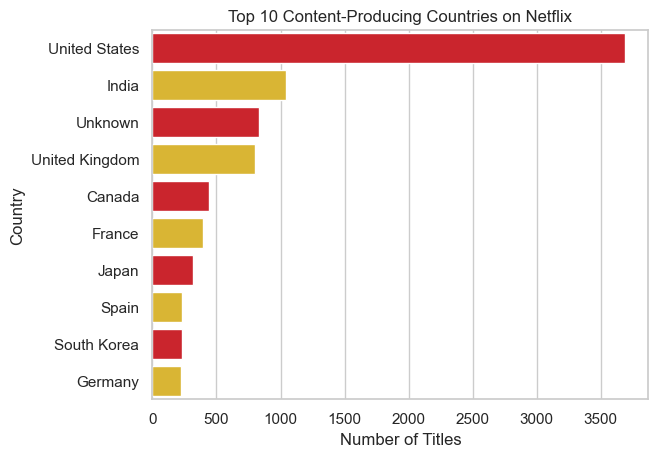

In [51]:
#Top 10 content-producing countries


country_data = df['country'].str.split(', ').explode().value_counts().head(10)

sns.barplot(y=country_data.index, x=country_data.values,palette=['#E50914', '#F5C518'])
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [18]:
##Insights##
#Quite a number of content is being produced by the United States and we see countries like Japan, Spain and South Korea coming out with more content.

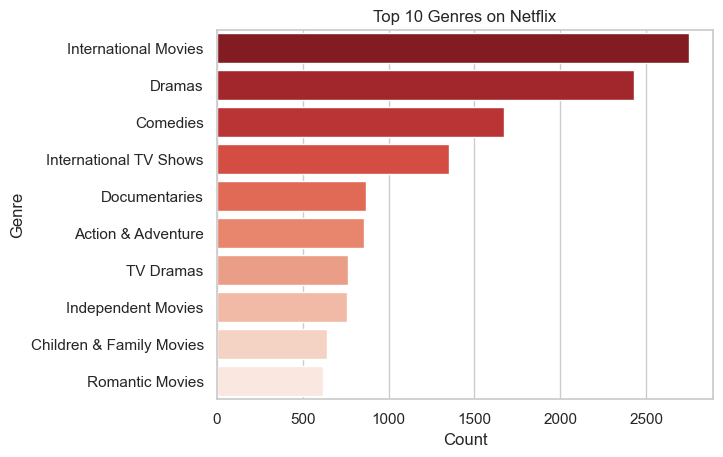

In [38]:
genre_df = (
    df['listed_in']
    .str.split(', ')      
    .explode()             
    .value_counts()       
    .head(10)              
    .reset_index()       
)

genre_df.columns = ['Genre', 'Count']
    
sns.barplot(y='Genre', x='Count', data=genre_df, palette='Reds_r')
plt.title('Top 10 Genres on Netflix')
plt.show()


In [24]:
##Insights##
# Most of the content pushed out on Netflix are International movies and Dramas with less Children &Family and Romantic movies being pushed out.

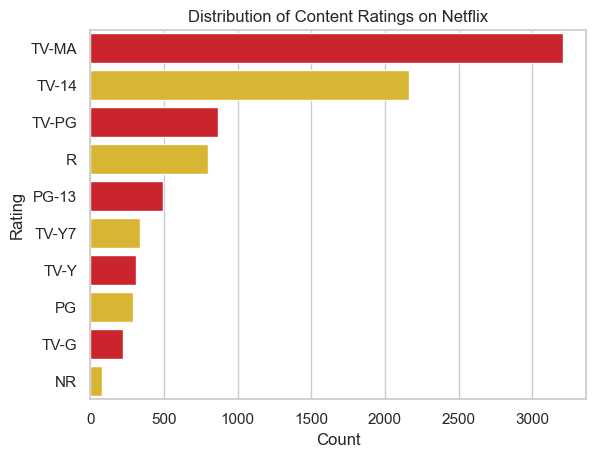

In [39]:
#Content Ratings distribution

rating_count = df['rating'].value_counts().head(10)

sns.barplot(y=rating_count.index, x=rating_count.values, palette=['#E50914', '#F5C518'])
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [69]:
##Insights##
#More content for the matured adults are bring pushed out on the platform than content for children or general consumption.

/var/folders/lh/47s33jhn523fblb6j65z78_r0000gn/T/ipykernel_1034/75335464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)


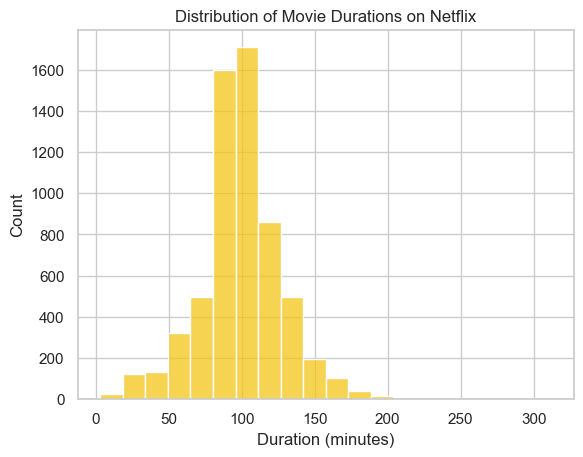

In [54]:
# Duration Analysis(Movies only)

movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

sns.histplot(movies['duration'], bins=20, color='#F5C518')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.show()


In [ ]:
##Insights##


In [57]:
pip install streamlit



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/reliancehealth/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-11-13 15:03:56.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 15:03:56.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

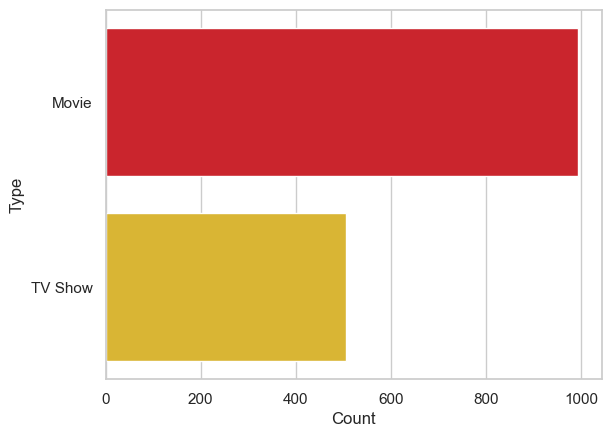

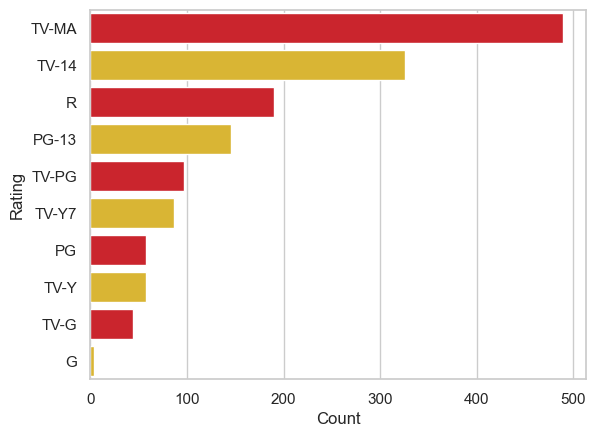

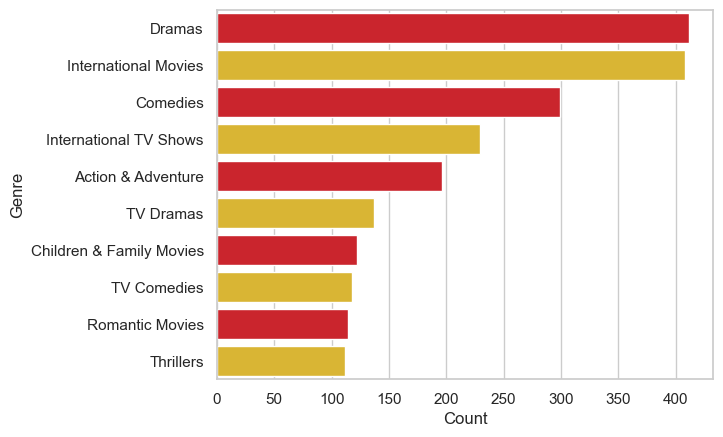

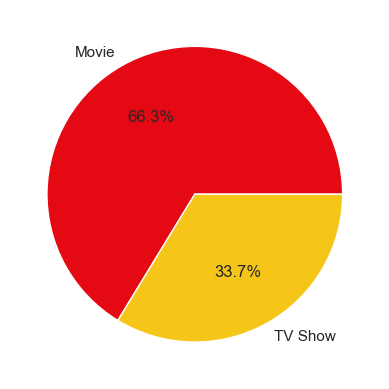

In [67]:
# app.py
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Load & clean data
# -------------------------------
df = pd.read_csv('/Users/reliancehealth/Downloads/netflix_titles.csv')

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df = df.dropna(subset=['year_added'])
df['year_added'] = df['year_added'].astype(int)

# -------------------------------
# Streamlit page setup
# -------------------------------
st.set_page_config(page_title="Netflix Dashboard", layout="wide")
st.title("🎬 Netflix Content Dashboard")
st.write("Explore Netflix content trends over time.")

# -------------------------------
# Sidebar year filter
# -------------------------------
year = st.sidebar.slider(
    "Select Year",
    int(df['year_added'].min()),
    int(df['year_added'].max()),
    value=int(df['year_added'].max())
)
filtered = df[df['year_added'] == year]

# -------------------------------
# Columns for charts
# -------------------------------
col1, col2 = st.columns(2)

# --- Column 1: Content Types ---
with col1:
    st.subheader(f"Content Types in {year}")
    type_count = filtered['type'].value_counts()
    fig1, ax1 = plt.subplots()
    sns.barplot(
        y=type_count.index, x=type_count.values,
        palette=['#E50914', '#F5C518'], ax=ax1
    )
    ax1.set_xlabel("Count")
    ax1.set_ylabel("Type")
    st.pyplot(fig1)

# --- Column 2: Ratings Distribution ---
with col2:
    st.subheader(f"Ratings Distribution in {year}")
    ratings_count = filtered['rating'].value_counts()
    fig2, ax2 = plt.subplots()
    sns.barplot(
        y=ratings_count.index, x=ratings_count.values,
        palette=['#E50914', '#F5C518'], ax=ax2
    )
    ax2.set_xlabel("Count")
    ax2.set_ylabel("Rating")
    st.pyplot(fig2)

# --- Full width: Top 10 Genres ---
st.subheader(f"Top 10 Genres in {year}")
genres = filtered['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
fig3, ax3 = plt.subplots()
sns.barplot(
    y=top_genres.index, x=top_genres.values,
    palette=['#E50914', '#F5C518'], ax=ax3
)
ax3.set_xlabel("Count")
ax3.set_ylabel("Genre")
st.pyplot(fig3)

# --- Optional: Pie chart for content types ---
st.subheader(f"Content Types Pie Chart in {year}")
fig4, ax4 = plt.subplots()
ax4.pie(
    type_count.values, labels=type_count.index,
    autopct='%1.1f%%', colors=['#E50914', '#F5C518']
)
st.pyplot(fig4)


In [68]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)